<a href="https://colab.research.google.com/github/Nazaruk-Anton/COVID-19-Genome-Sequencing-Analysis-and-Bit-Score-Prediction/blob/main/Part_3_PCA_Analysis_of_Genome_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Loading in packages

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [3]:
### Reading in data. Our data is stored in a dataframe called 'df'.

df = pd.read_csv('/content/Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


<ipython-input-4-f2872c830eb2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


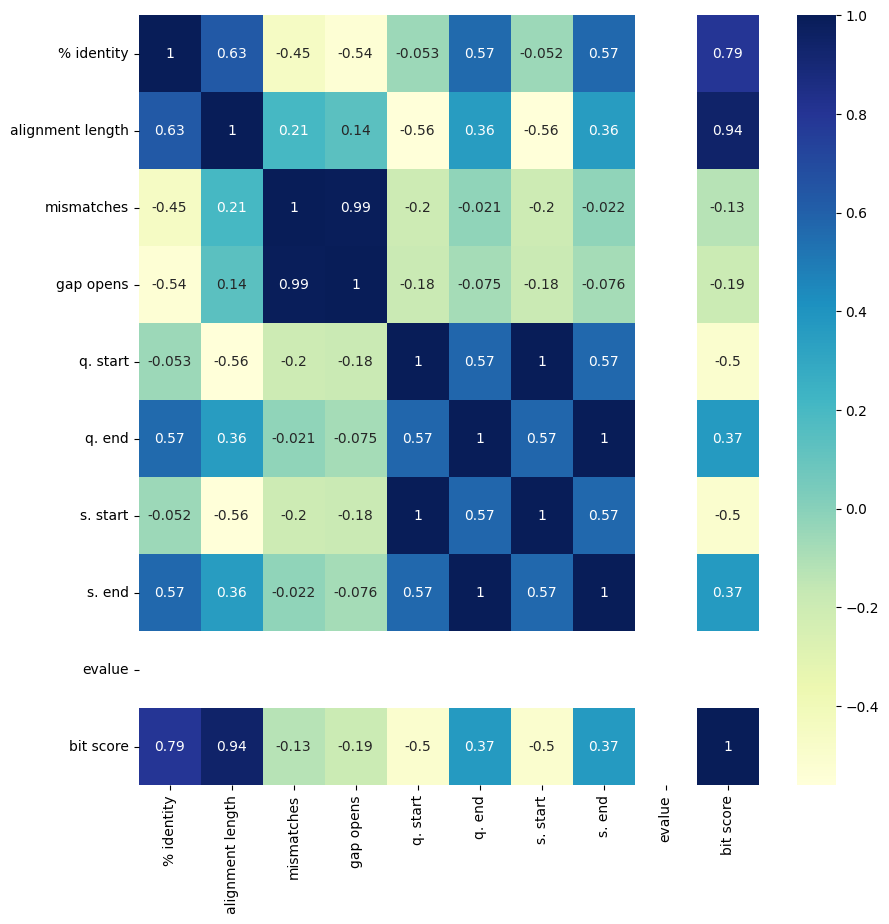

In [4]:
## Use the .describe() method to analyze the dataframe. Store the results in a new dataframe called 'results'.

results = df.describe()

## Store the correlation of the dataframe in a variable called 'corr'.

corr = df.corr()

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a heatmap with correlation values, annotated with the values
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# Display the plot
plt.show()

In [5]:
## Perform PCA with 2 components on the numeric columns of the datafame. Fit the PCA in a variable called 'pca'.

df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']]

pca = PCA(n_components=2)
pca.fit(df_numeric);

In [6]:
## Store the components of the PCA in a dataframe called 'components'. Name the index as ['Component 1', 'Component 2'].

components = pd.DataFrame(pca.components_)

components.columns = ['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']

components.index = ['Component 1', 'Component 2']

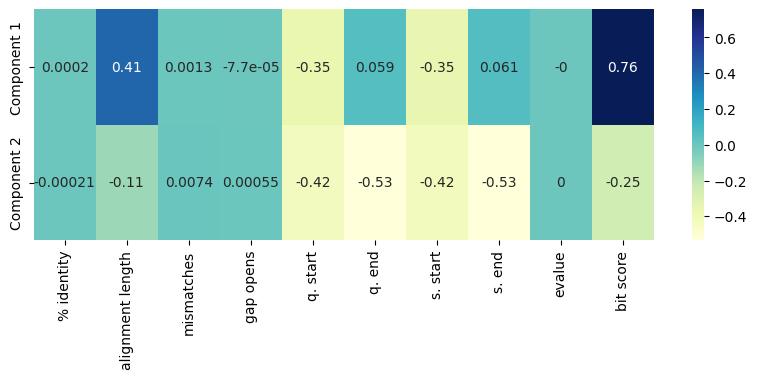

In [7]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(10, 3))

# Generate a heatmap with the components data, annotated with the values
sns.heatmap(components, annot=True, cmap='YlGnBu')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

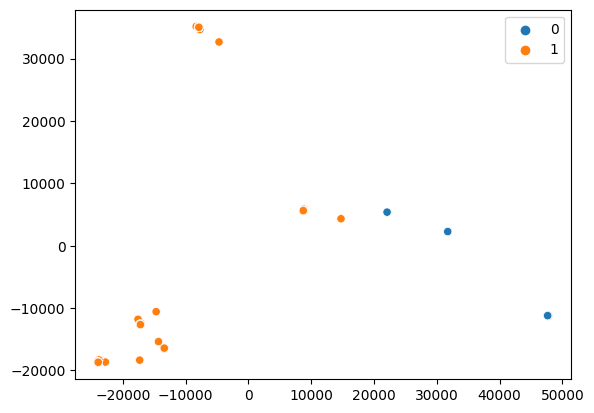

In [9]:
## Fit a K-Means clustering algorithm on the numeric data with 2 clusters and a random state of 0.
## Store the predicted groups in a variable called 'y_pred'

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)

# Create a scatter plot to visualize the transformed data using PCA

sns.scatterplot(x= pca.transform(df_numeric)[:, 0], y = pca.transform(df_numeric)[:, 1], hue = y_pred)

In [11]:
silhouette_avg = silhouette_score(df_numeric, y_pred)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.6051834228711443


# Conclusion
The silhouette score obtained, 0.605, indicates that the K-means algorithm, applied after conducting PCA with 2 components on the numeric columns of the dataframe, has achieved a reasonably good clustering outcome. The silhouette score ranges from -1 to 1, with values closer to 1 indicating well-clustered and accurately assigned samples. In this case, the score of 0.605 suggests a moderate to good separation between the clusters, indicating that the algorithm has captured meaningful patterns in the data.